In [1]:
from gridworldv4 import *

In [2]:
from stage2skeletonv3 import * # mind the (missing) capitalisation -> CoLab

Student Code goes below

In [3]:
statespace_size=7 # 3 positions (x,y) + 1 boolean flag for loaded 

In [4]:
gamma = 0.95
epsilon = 1.0
epsilon_min=0.01
epsilon_decay=0.995

In [5]:
def TD_target(reward, gamma, done, qMax):
  target = reward + gamma*(1-done)*qMax
  return target

In [6]:
action_set = {
    0: 'u',
    1: 'd',
    2: 'l',
    3: 'r',
}

In [10]:
from collections import deque
from IPython.display import clear_output

epochs = 10000
mem_size = 2000
batch_size = 128
replay = deque(maxlen=mem_size)
max_moves = 100
h = 0
sync_freq = 200
j=0
losses=[]
rewards=[]
successes=0

model = prepare_torch()

for i in range(epochs):
    game = Gridworld(size=4, mode='random')
    state1 = game.short_state_np().reshape(1,statespace_size)
    status = 1
    mov = 0
    episode_reward=0
    while(status == 1):
        j+=1
        mov += 1
        qvals = get_qvals(state1)
        if (random.random() < epsilon):
            action_ = np.random.randint(0,4)
        else:
            action_ = np.argmax(qvals)
        if epsilon > epsilon_min:
          epsilon *= epsilon_decay

        action = action_set[action_]
        game.makeMove(action)
        state2 = game.short_state_np().reshape(1,statespace_size)
        reward = game.reward()
        episode_reward += reward
        done = True if reward > 50 else False # more than just picking up
        if done:
            successes += 1
        exp =  (state1, action_, reward, state2, done)
        replay.append(exp)
        state1 = state2

        if len(replay) > batch_size:
            minibatch = random.sample(replay, batch_size)
            states = [s1 for (s1,a,r,s2,d) in minibatch]
            actions = [a for (s1,a,r,s2,d) in minibatch]
            targets = [TD_target(r, gamma, d, get_maxQ(s2)) for (s1,a,r,s2,d) in minibatch]
            current_loss = train_one_step(states, actions, targets, gamma)
            losses.append(current_loss)
            clear_output(wait=True)
            print(i, " successes: ",successes, " loss=",current_loss)
            print(f"episode reward: {episode_reward} mov: {mov}")
            print()
            if j % sync_freq == 0:
              update_target()
        if reward == 500 or mov > max_moves:
          rewards.append(episode_reward)  
          status = 0
          mov = 0


579  successes:  148  loss= 412.8285827636719



KeyboardInterrupt: 

The project implementation ends here. The rest is for evaluation only.

<Figure size 1000x700 with 0 Axes>

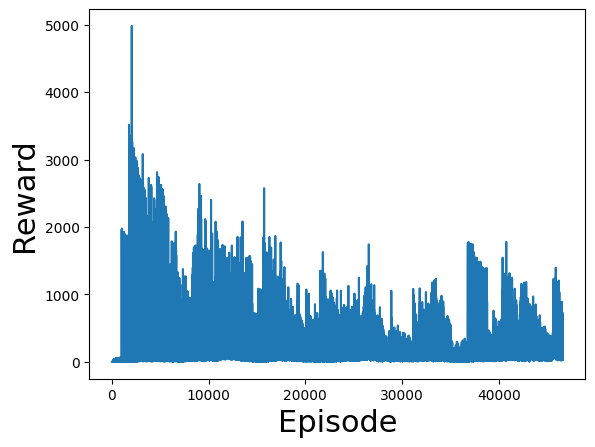

<Figure size 1000x700 with 0 Axes>

In [11]:
from matplotlib import pylab as plt

plt.xlabel("Episode",fontsize=22)
plt.ylabel("Reward",fontsize=22)
plt.plot(np.array(losses))
plt.figure(figsize=(10,7))

In [13]:
losses[-1]

412.8285827636719

<Figure size 1000x700 with 0 Axes>

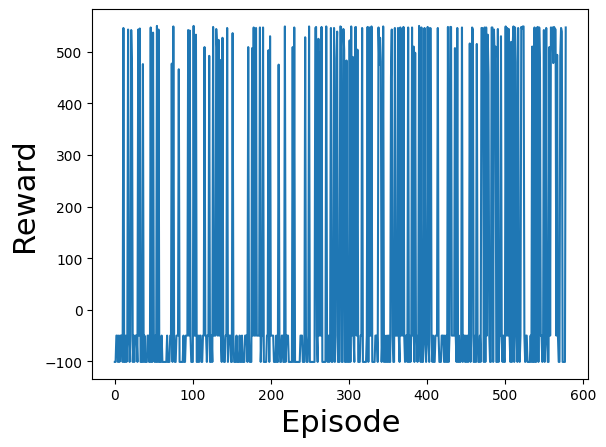

<Figure size 1000x700 with 0 Axes>

In [12]:
from matplotlib import pylab as plt

plt.xlabel("Episode",fontsize=22)
plt.ylabel("Reward",fontsize=22)
plt.plot(np.array(rewards))
plt.figure(figsize=(10,7))

Testing the Model

In [14]:
def test_model(model, mode='static', display=True):
    i = 0
    test_game = Gridworld(mode=mode)
    state_ = test_game.short_state_np().reshape(1,statespace_size)
    state = torch.from_numpy(state_).float()
    if display:
        print("Initial State:")
        print(test_game.display())
    status = 1
    while(status == 1):
        qval = model(state)
        qval_ = qval.data.numpy()
        action_ = np.argmax(qval_)
        action = action_set[action_]
        if display:
            print('Move #: %s; Taking action: %s' % (i, action))
        test_game.makeMove(action)
        state_ = test_game.short_state_np().reshape(1,statespace_size)
        state = torch.from_numpy(state_).float()
        if display:
            print(test_game.display())
        reward = test_game.reward()
        if reward > 50: 
            status = 2
            if display:
                print("Game won! Reward: %s" % (reward,))
        i += 1
        if (i > 20):
            if display:
                print("Game lost; too many moves.")
            break
    win = True if status == 2 else False
    return win

In [22]:
test_model(model,'random')

Initial State:
[['A' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' 'P']]
Move #: 0; Taking action: u
[['A' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 1; Taking action: u
[['A' ' ' ' ' ' ']
 [' ' ' ' ' ' 'P']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 2; Taking action: u
[['A' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 3; Taking action: u
[['A' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 4; Taking action: u
[['A' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 5; Taking action: u
[['A' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 6; Taking action: u
[['A' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 7; Taking action: u
[['A' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'B']
 [' ' ' ' ' ' ' ']]
Move #: 8; Taking action: u
[['A' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [

False

Get a statistic of coutcomes

In [23]:
def test_stats(model):
  max_games = 1000
  wins = 0
  for i in range(max_games):
      win = test_model(model, mode='random', display=False)
      if win:
          wins += 1
  win_perc = float(wins) / float(max_games)
  print("Games played: {0}, # of wins: {1}".format(max_games,wins))
  print("Win percentage: {}".format(win_perc))

In [24]:
test_stats(model)

Games played: 1000, # of wins: 266
Win percentage: 0.266


How often would a complete random model win?

In [25]:
from types import SimpleNamespace

wrapper = SimpleNamespace(numpy=lambda : np.random.rand(len(action_set)) )

randomQgenerator = SimpleNamespace(data=wrapper)

def randomModel(x):
  #random Q-values
  return randomQgenerator

This definition is a bit convoluted. Instead of just generating a network it generates a callable object that returns a list of random q values in the same form as the torch network. This is to make it compatible with the implementation of the real model. 

In [30]:
test_stats(randomModel)

Games played: 1000, # of wins: 173
Win percentage: 0.173
